In [24]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn

!pip install graphviz

!pip install xlrd
!pip install openpyxl

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [70]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [71]:
df = pd.read_csv(path)

In [72]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
0,0,1,5433,0,0,1,0,0,0.00,0,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1,1,1,5302,1,1,8,5,1,48.85,1,...,34.044271,-118.185237,0,74,0,1,1,1,1,55668
2,2,1,3179,0,0,18,4,1,11.33,1,...,34.108833,-118.229715,1,71,0,1,0,1,3,47534
3,3,1,5337,1,1,25,3,1,19.76,0,...,33.936291,-118.332639,0,78,0,1,1,1,1,27778
4,4,1,2793,1,1,37,3,1,6.33,1,...,33.972119,-118.020188,0,80,0,1,1,1,1,26265


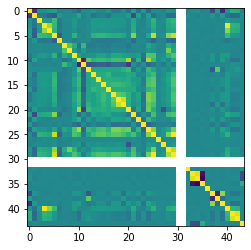

In [73]:
plt.imshow(df.corr())

In [74]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [77]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
0,1,5433,0,0,1,0,0,0.00,0,1,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1,1,5302,1,1,8,5,1,48.85,1,1,...,34.044271,-118.185237,0,74,0,1,1,1,1,55668
2,1,3179,0,0,18,4,1,11.33,1,1,...,34.108833,-118.229715,1,71,0,1,0,1,3,47534
3,1,5337,1,1,25,3,1,19.76,0,1,...,33.936291,-118.332639,0,78,0,1,1,1,1,27778
4,1,2793,1,1,37,3,1,6.33,1,1,...,33.972119,-118.020188,0,80,0,1,1,1,1,26265


In [78]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.1, train_size=None, random_state=None, shuffle=True, stratify=None)

In [79]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
5450,5565,1,3,46,2,0,0.00,0,1,1,...,37.343846,-121.039391,0,50,0,0,1,0,0,8504
6289,2682,0,0,35,3,1,4.24,0,0,3,...,37.779500,-122.419233,1,33,0,0,0,0,0,28998
6418,5537,0,0,59,0,1,25.89,1,0,3,...,37.346670,-121.910019,1,25,1,0,0,0,0,18197
5167,3265,0,0,20,0,1,22.75,1,1,0,...,36.527600,-119.865999,0,44,0,0,0,0,0,5446
5595,3744,1,10,34,3,1,35.29,1,1,2,...,38.784329,-121.373245,0,20,1,0,1,0,0,25418


#### Linear regression - Baseline

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
reg = LinearRegression().fit(training_features, training_target)

In [82]:
reg.score(testing_features, testing_target)

0.29069335867372015

#### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(training_features, training_target)

DecisionTreeRegressor(max_depth=3)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
pred = model.predict(testing_features)
print(testing_target.shape)
pred = np.where(pred < 0.5, 0, 1)
print(pred.shape)

(705,)
(705,)


In [86]:
accuracy_score(testing_target, pred)

0.8070921985815603

In [87]:
import graphviz
from sklearn import tree

In [88]:
dot_data = tree.export_graphviz(model, feature_names = list(training_features), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 

In [89]:
graph.render(view=True)

'Source.gv.pdf'